<a href="https://colab.research.google.com/github/RtemShcherbak/Homeworks/blob/main/%D0%94%D0%97%E2%84%963_%D0%A9%D0%B5%D1%80%D0%B1%D0%B0%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Загрузка данных

## 1.1 Установка ключа и скачивание данных

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle.json

mkdir: cannot create directory ‘/root/.kaggle.json’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download digit-recognizer/data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## 1.2 Библиотеки

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report, roc_curve, auc


# Models
from catboost import CatBoostClassifier
from sklearn.naive_bayes import ComplementNB, MultinomialNB, BernoulliNB

#Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



##1.3 Загрузка датасета в pandas dataframe

In [ ]:
init_data_train = pd.read_csv('/content/train.csv')
init_data_test = pd.read_csv('/content/test.csv')

# 2.Первичная проверка данных

  Для проверки корректности загрузки посмотрим на первые 10 и последние 10 значений

In [ ]:
init_data_train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
init_data_test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
train = init_data_train.copy(deep=True)
test = init_data_test.copy(deep=True)

In [ ]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [ ]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# 3.Основное исследование

<Axes: >

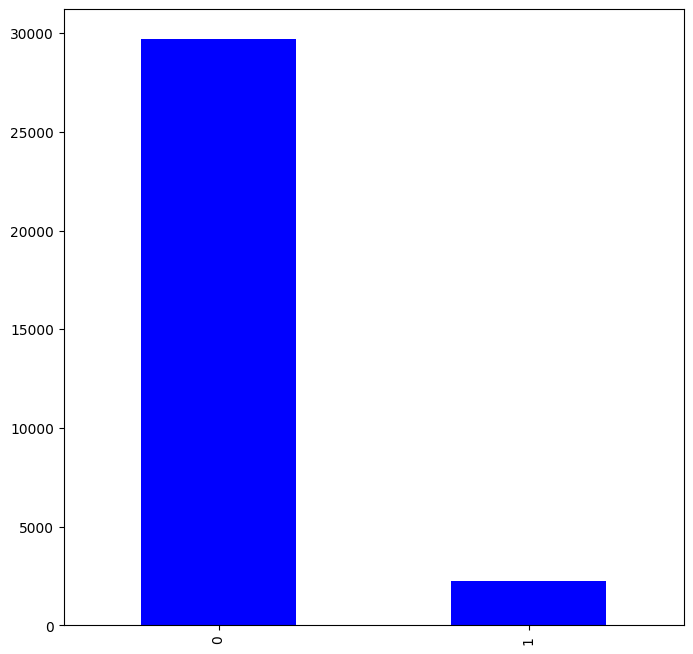

In [ ]:
train['label'].value_counts().plot.bar(color='b' , figsize=(8,8))

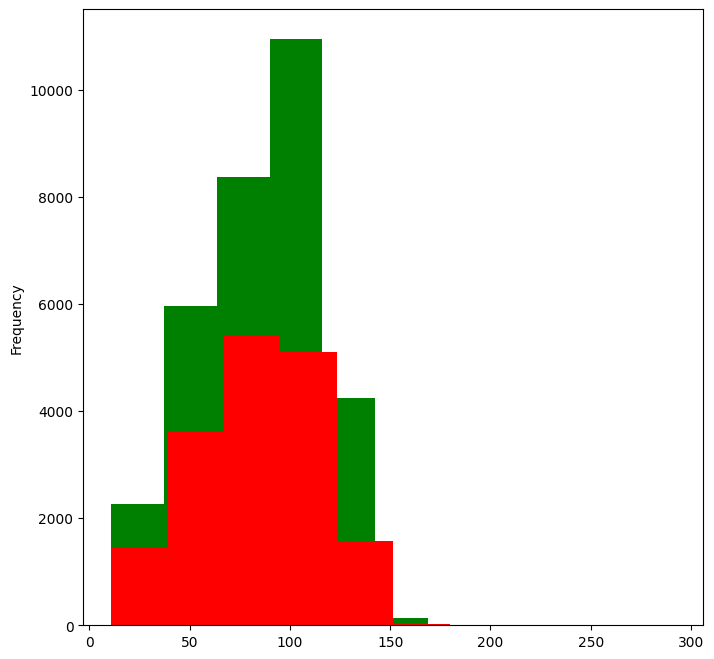

In [ ]:
length_train = train['tweet'].str.len().plot.hist(color = 'g' , figsize = (8,8))
length_test = test['tweet'].str.len().plot.hist(color = 'r' , figsize = (8,8))

In [ ]:
train['tweet'].str.len().mean()

84.73962830861649

In [ ]:
test['tweet'].str.len().mean()

84.54637436762226

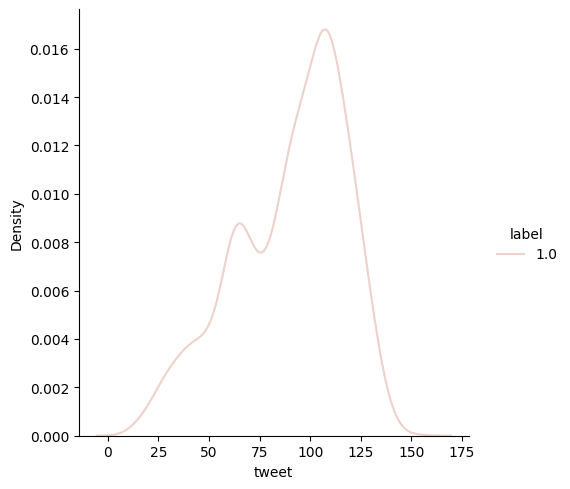

In [ ]:
sns.displot(x = train['tweet'].str.len(),
            hue = "label",
            kind = "kde",
            data = train[train['label'] == 1]
            );

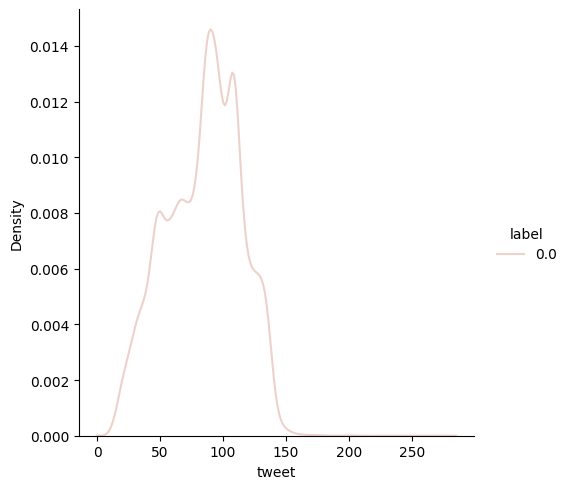

In [ ]:
sns.displot(x = train['tweet'].str.len(),
            hue = "label",
            kind = "kde",
            data = train[train['label'] == 0]
            )

In [ ]:
len_pos_twee_mean = train['tweet'][train['label'] == 0].str.len().mean()
len_neg_twee_mean = train['tweet'][train['label'] == 1].str.len().mean()
len_pos_twee_median = train['tweet'][train['label'] == 0].str.len().median()
len_neg_twee_median = train['tweet'][train['label'] == 1].str.len().median()
print(f'len positive tweet: mean = {len_pos_twee_mean}, median = {len_pos_twee_median}\n'\
      f'len negative tweet: mean = {len_neg_twee_mean}, median = {len_neg_twee_median}')

len positive tweet: mean = 84.32863391655451, median = 88.0
len negative tweet: mean = 90.18777876895629, median = 96.0


In [ ]:
!pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [ ]:
nltk.download("stopwords")
stopWords = stopwords.words('english')
# stopWords.append('user')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


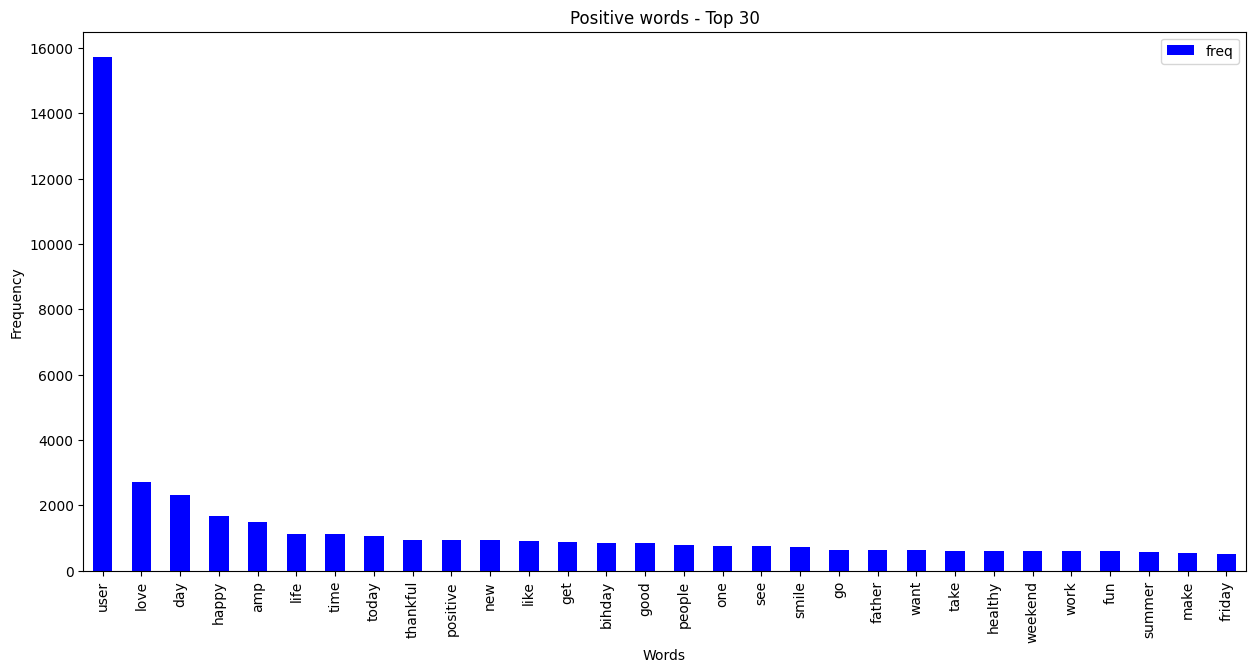

In [ ]:
cv = CountVectorizer(stop_words = stopWords)
words = cv.fit_transform(train[train['label'] == 0].tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color= "blue")
plt.title("Positive words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

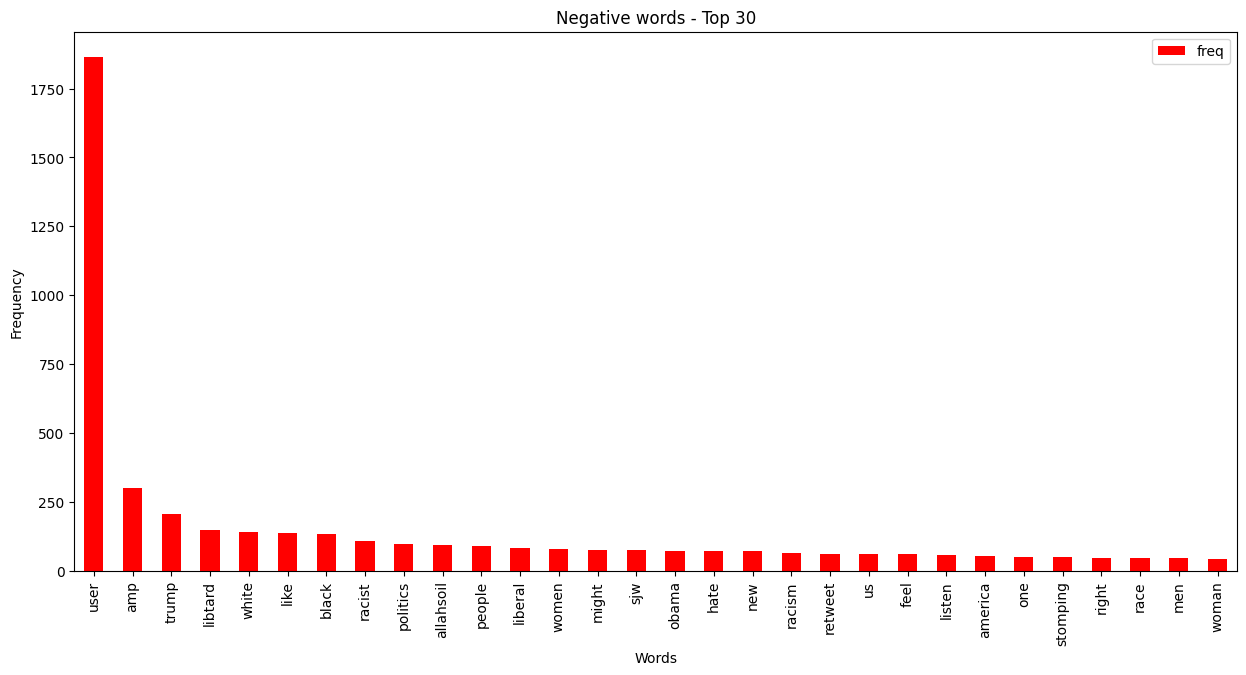

In [ ]:
cv = CountVectorizer(stop_words = stopWords)
words = cv.fit_transform(train[train['label'] == 1].tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color= "red")
plt.title("Negative words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
train['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
data_proba = train.copy(deep=True)
data_proba['tweet'] = data_proba['tweet'].str.replace('[^\w\s]', '', regex=True)
data_proba['tweet'] = data_proba['tweet'].str.replace('ð', '', regex=True)

In [ ]:
data_proba['tweet'][0]

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'

## Вывод
1) Классы сильно несбаласированны;

2) В целом, судя по различию наборов наиболее популярных слов в каждом классе, классы должны быть различимы;

3) В среднем, человек тратит на 6-8 символов больше, если пишет негативный комментарий;

4) В твитах присутствует значительное количество небуквенных символов. Т.к нет чёткой уверенности в том, что количество и/или комбинации этих симоволов не будут влиять на эмоциональную окраску твита, необходимо провести эксперименты как с очищенными данными, так и с первоначальными данными, содержащими все эти символы.

# 4.Моделирование

## Вспомогательные функции

In [ ]:
def drop_data_points(dataframe: pd.DataFrame, percent: float):
  """
    Эта функция "проредит" данные, уберёт те точки, у которых target = 0,
    причём количество выбрасываемых строк не может больше максимального, того,
    которое сделает несбалансрованным уже 1 класс

    :param percent: percent of dropped rows
    :type percent: float

    :param dataframe: init data
    :type dataframe: pandas.DataFrame

    :raises None

    :rtype: pandas.DataFrame

    :return: thinned dataframe
    """
  dataframe = dataframe.sample(frac=1)
  dct_value_counts = dict(dataframe['label'].value_counts())
  slc = int((percent / 100) * dataframe.shape[0])
  if slc > dataframe.shape[0] - dct_value_counts[1] * 2:
    print('Число отбрасываемых строк превышает максимально допустимое')
    slc = dataframe.shape[0] - dct_value_counts[1] * 2
  return dataframe.sort_values(by='label')[slc:]

In [ ]:
def plot_roc_curve(model, test_labels):
  y_pred_proba = model.predict_proba(X_test_vectors)[::, 1]
  fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
  auc = roc_auc_score(test_labels, y_pred_proba)
  plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.legend(loc=4)
  plt.ylabel("True Positive Rate", fontsize=20)
  plt.xlabel("False Positive Rate", fontsize=20)
  plt.show()

In [ ]:
results = []

## 4.1 Tf-idf

In [ ]:
train_train, train_test = train_test_split(train,
                                           test_size=0.2,
                                           stratify=train['label'],
                                           random_state=42
                                           )

In [ ]:
train_train['label'].value_counts()

0    23775
1     1794
Name: label, dtype: int64

In [ ]:
train_test['label'].value_counts()

0    5945
1     448
Name: label, dtype: int64

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopWords[:20])
vectorizer = vectorizer.fit(train['tweet'])

In [ ]:
X_train_vectors = vectorizer.transform(train_train['tweet'])
Y_train_labels = train_train['label'].to_numpy()

X_test_vectors = vectorizer.transform(train_test['tweet'])
Y_test_labels = train_test['label'].to_numpy()

In [ ]:
clf = MultinomialNB().fit(X_train_vectors, Y_train_labels)

In [ ]:
predicts = clf.predict(X_test_vectors)
print(classification_report(Y_test_labels, predicts))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.12      0.21       448

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.59      6393
weighted avg       0.94      0.94      0.91      6393



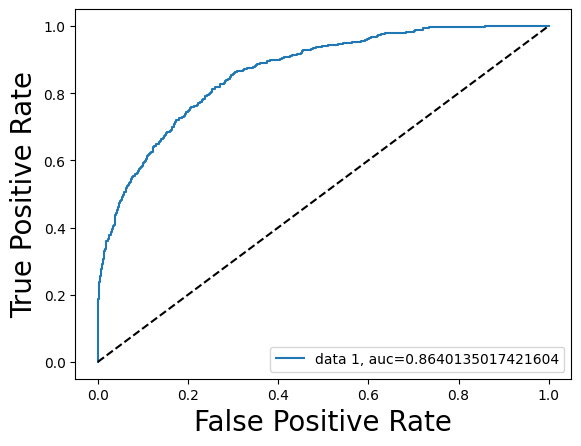

In [ ]:
plot_roc_curve(clf, Y_test_labels)

In [ ]:
results.append({'model': 'MultinomialNB',
                'auc': 0.86,
                'data': None,
                'f1_macro': 0.59,
                'recall_1': 0.12,
                'precision_1': 1.00})

In [ ]:
cat = CatBoostClassifier(iterations=1000,
                         devices='0:1',
                         )
cat.fit(X_train_vectors, Y_train_labels)

Learning rate set to 0.041118
0:	learn: 0.6483398	total: 553ms	remaining: 9m 12s
1:	learn: 0.6076705	total: 991ms	remaining: 8m 14s
2:	learn: 0.5717376	total: 1.42s	remaining: 7m 50s
3:	learn: 0.5394269	total: 1.83s	remaining: 7m 34s
4:	learn: 0.5095453	total: 2.21s	remaining: 7m 20s
5:	learn: 0.4821207	total: 2.65s	remaining: 7m 19s
6:	learn: 0.4584824	total: 3.1s	remaining: 7m 19s
7:	learn: 0.4368974	total: 3.57s	remaining: 7m 22s
8:	learn: 0.4174617	total: 3.97s	remaining: 7m 17s
9:	learn: 0.3994495	total: 4.41s	remaining: 7m 16s
10:	learn: 0.3818222	total: 4.87s	remaining: 7m 17s
11:	learn: 0.3673598	total: 5.35s	remaining: 7m 20s
12:	learn: 0.3530243	total: 5.8s	remaining: 7m 20s
13:	learn: 0.3403031	total: 6.26s	remaining: 7m 21s
14:	learn: 0.3284541	total: 6.72s	remaining: 7m 21s
15:	learn: 0.3187170	total: 7.16s	remaining: 7m 20s
16:	learn: 0.3088665	total: 7.67s	remaining: 7m 23s
17:	learn: 0.3007415	total: 8.13s	remaining: 7m 23s
18:	learn: 0.2934448	total: 8.59s	remaining: 7

In [ ]:
predicts = cat.predict(vectorizer.transform(train_test['tweet']))
print(classification_report(train_test['label'], predicts))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.86      0.42      0.56       448

    accuracy                           0.95      6393
   macro avg       0.91      0.71      0.77      6393
weighted avg       0.95      0.95      0.95      6393



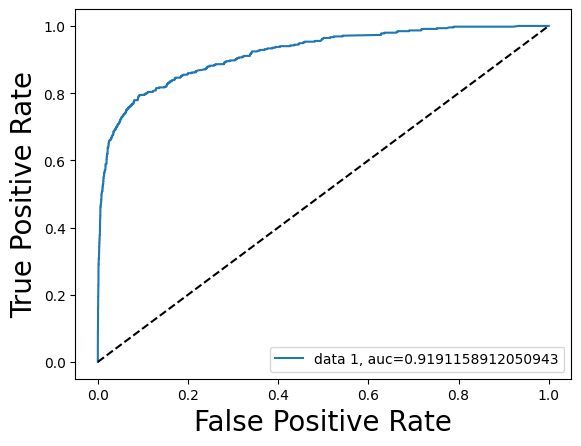

In [ ]:
plot_roc_curve(cat, Y_test_labels)

In [ ]:
results.append({'model': 'CatBoostClassifier',
                'auc': 0.92,
                'data': None,
                'f1_macro': 0.77,
                'recall_1': 0.42,
                'precision_1': 0.86})

## 4.2 Tf-idf + drop_data_points

In [ ]:
train2 = train.copy(deep=True)

In [ ]:
train_train, train_test = train_test_split(train2,
                                           test_size=0.2,
                                           stratify=train2['label'],
                                           random_state=42
                                           )

In [ ]:
train_train = drop_data_points(train_train, 80)

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopWords[:20])
vectorizer = vectorizer.fit(train['tweet'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  warnings.warn(


In [ ]:
X_train_vectors = vectorizer.transform(train_train['tweet'])
Y_train_labels = train_train['label'].to_numpy()

X_test_vectors = vectorizer.transform(train_test['tweet'])
Y_test_labels = train_test['label'].to_numpy()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.83      0.52      0.64       448

    accuracy                           0.96      6393
   macro avg       0.90      0.75      0.81      6393
weighted avg       0.96      0.96      0.95      6393



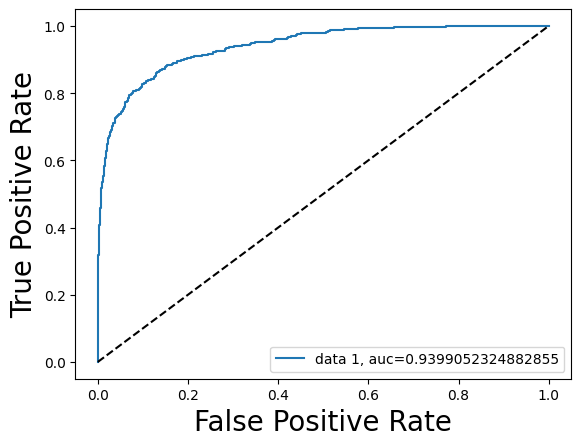

In [ ]:
clf = MultinomialNB().fit(X_train_vectors, Y_train_labels)
predicts = clf.predict(X_test_vectors)
print(classification_report(Y_test_labels, predicts))
plot_roc_curve(clf, Y_test_labels)

In [ ]:
results.append({'model': 'MultinomialNB',
                'auc': 0.94,
                'data': 'dropped points',
                'f1_macro': 0.81,
                'recall_1': 0.52,
                'precision_1': 0.83})

In [ ]:
cat = CatBoostClassifier(iterations=500,
                         devices='0:1',
                         )
cat.fit(X_train_vectors, train_train['label'])

Learning rate set to 0.03905
0:	learn: 0.6823707	total: 86.7ms	remaining: 43.2s
1:	learn: 0.6724197	total: 160ms	remaining: 39.8s
2:	learn: 0.6636344	total: 235ms	remaining: 39s
3:	learn: 0.6544742	total: 332ms	remaining: 41.2s
4:	learn: 0.6463152	total: 403ms	remaining: 39.9s
5:	learn: 0.6383801	total: 480ms	remaining: 39.5s
6:	learn: 0.6319581	total: 553ms	remaining: 39s
7:	learn: 0.6258637	total: 639ms	remaining: 39.3s
8:	learn: 0.6184336	total: 717ms	remaining: 39.1s
9:	learn: 0.6125145	total: 793ms	remaining: 38.9s
10:	learn: 0.6078664	total: 866ms	remaining: 38.5s
11:	learn: 0.6025668	total: 942ms	remaining: 38.3s
12:	learn: 0.5957908	total: 1.02s	remaining: 38.4s
13:	learn: 0.5911285	total: 1.09s	remaining: 38s
14:	learn: 0.5858339	total: 1.18s	remaining: 38.1s
15:	learn: 0.5809270	total: 1.25s	remaining: 37.9s
16:	learn: 0.5765580	total: 1.33s	remaining: 37.9s
17:	learn: 0.5729635	total: 1.41s	remaining: 37.8s
18:	learn: 0.5691253	total: 1.5s	remaining: 37.9s
19:	learn: 0.56522

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5945
           1       0.52      0.65      0.58       448

    accuracy                           0.93      6393
   macro avg       0.75      0.80      0.77      6393
weighted avg       0.94      0.93      0.94      6393



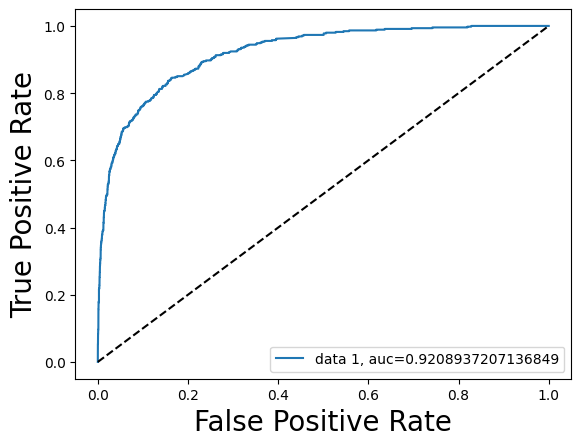

In [ ]:
predicts = cat.predict(X_test_vectors)
print(classification_report(Y_test_labels, predicts))
plot_roc_curve(cat, Y_test_labels)

In [ ]:
results.append({'model': 'CatBoostClassifier',
                'auc': 0.92,
                'data': 'dropped points',
                'f1_macro': 0.77,
                'recall_1': 0.65,
                'precision_1': 0.52})

## 4.3 Очистка данных при помощи регулярных выражений

In [ ]:
data_proba.head(4)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...


In [ ]:
train_train, train_test = train_test_split(data_proba,
                                           test_size=0.2,
                                           stratify=data_proba['label'],
                                           random_state=42
                                           )

In [ ]:
train_train['label'].value_counts()

0    23775
1     1794
Name: label, dtype: int64

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopWords[:20])
vectorizer = vectorizer.fit(data_proba['tweet'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  warnings.warn(


In [ ]:
X_train_vectors = vectorizer.transform(train_train['tweet'])
Y_train_labels = train_train['label'].to_numpy()

X_test_vectors = vectorizer.transform(train_test['tweet'])
Y_test_labels = train_test['label'].to_numpy()

In [ ]:
clf = MultinomialNB().fit(X_train_vectors, Y_train_labels)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.11      0.20       448

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.59      6393
weighted avg       0.94      0.94      0.91      6393



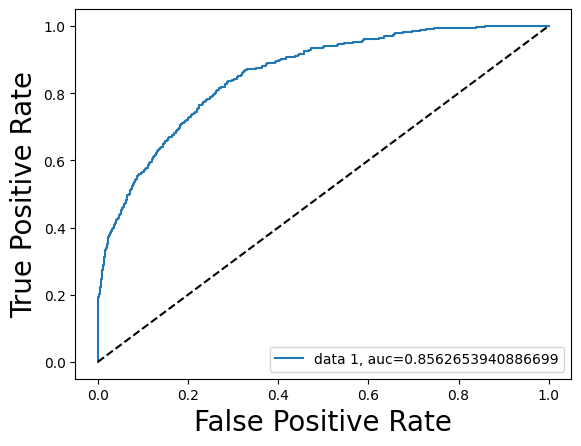

In [ ]:
predicts = clf.predict(X_test_vectors)
print(classification_report(Y_test_labels, predicts))
plot_roc_curve(clf, Y_test_labels)

In [ ]:
results.append({'model': 'MultinomialNB',
                'auc': 0.86,
                'data': 'regex',
                'f1_macro': 0.59,
                'recall_1': 0.11,
                'precision_1': 1.00})

In [ ]:
cat = CatBoostClassifier(iterations=500,
                         devices='0:1',
                         )

cat.fit(X_train_vectors, train_train['label'])

Learning rate set to 0.077638
0:	learn: 0.6105670	total: 633ms	remaining: 5m 15s
1:	learn: 0.5432923	total: 919ms	remaining: 3m 48s
2:	learn: 0.4877513	total: 1.19s	remaining: 3m 16s
3:	learn: 0.4425502	total: 1.47s	remaining: 3m 2s
4:	learn: 0.4067202	total: 1.75s	remaining: 2m 52s
5:	learn: 0.3736582	total: 2.01s	remaining: 2m 45s
6:	learn: 0.3467391	total: 2.29s	remaining: 2m 41s
7:	learn: 0.3234003	total: 2.56s	remaining: 2m 37s
8:	learn: 0.3051159	total: 2.84s	remaining: 2m 35s
9:	learn: 0.2900793	total: 3.11s	remaining: 2m 32s
10:	learn: 0.2779099	total: 3.38s	remaining: 2m 30s
11:	learn: 0.2682310	total: 3.65s	remaining: 2m 28s
12:	learn: 0.2588280	total: 3.93s	remaining: 2m 27s
13:	learn: 0.2521363	total: 4.2s	remaining: 2m 25s
14:	learn: 0.2451711	total: 4.47s	remaining: 2m 24s
15:	learn: 0.2395984	total: 4.74s	remaining: 2m 23s
16:	learn: 0.2345417	total: 5.01s	remaining: 2m 22s
17:	learn: 0.2303210	total: 5.32s	remaining: 2m 22s
18:	learn: 0.2266985	total: 5.72s	remaining: 2

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.85      0.41      0.55       448

    accuracy                           0.95      6393
   macro avg       0.90      0.70      0.76      6393
weighted avg       0.95      0.95      0.95      6393



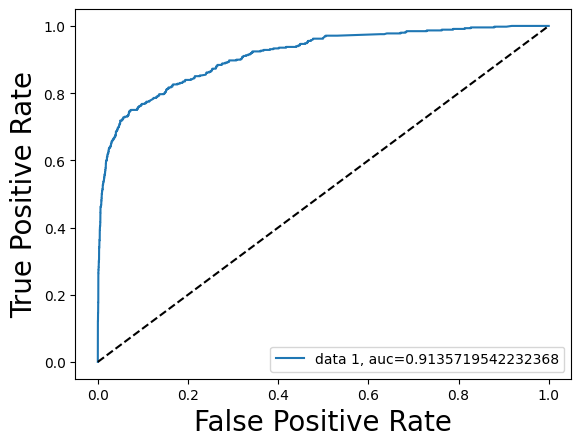

In [ ]:
predicts = cat.predict(X_test_vectors)
print(classification_report(Y_test_labels, predicts))
plot_roc_curve(cat, Y_test_labels)

In [ ]:
results.append({'model': 'CatBoostClassifier',
                'auc': 0.91,
                'data': 'regex',
                'f1_macro': 0.76,
                'recall_1': 0.41,
                'precision_1': 0.85})

In [ ]:
results = pd.DataFrame(results)
results

,model,auc,data,f1_macro,recall_1,precision_1
0,MultinomialNB,0.86,None,0.59,0.12,1.00
1,CatBoostClassifier,0.92,None,0.77,0.42,0.86
2,MultinomialNB,0.94,dropped points,0.81,0.52,0.83
3,CatBoostClassifier,0.92,dropped points,0.77,0.65,0.52
4,MultinomialNB,0.86,regex,0.59,0.11,1.00
5,CatBoostClassifier,0.91,regex,0.76,0.41,0.85


# Вывод
1) При обработке текста классическими алгоритмами сбалансированность классов играет крайне важную роль;

2) На исходных данных CatBoostClassifier даёт результат лучше, чем MultinominalNB, судя по метрике f1_macro_average;

3) Прореживание части данных, чтобы сбалансировать классы, существенно улучшает метрику f1_macro MultiNominalNB, увеличивая recall и не сильно снижая precision;

4) На метрику f1_macro CatBoostClassifier прореживание данных практически не влияет. Меняется распределение между recall и precision;

5) "Чистка" текста при помощи регулярных выражений практически не меняет метрику.

#  --------------

# Неудачная попытка (

## 4.4 Embendings

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 20.7 MB/s eta 0:00:00


In [ ]:
len(train_train['tweet'].to_list())

25569

In [ ]:
def get_batches(data, batch_size):

    n_samples = len(data)
    batch_size  = 1000
    indices = np.arange(n_samples)

    for start in range(0, n_samples, batch_size):
      end = min(start + batch_size, n_samples)
      batch_idx = indices[start: end]

      yield data[start: end]

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask


#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")


In [ ]:
embs = []
x_train_list = train_train['tweet'].to_list()

for batch in get_batches(x_train_list, 1000):
  #Sentences we want sentence embeddings for
  sentences = batch

  #Tokenize sentences
  encoded_input = tokenizer(sentences,
                            padding=True,
                            truncation=True,
                            max_length=24,
                            return_tensors='pt')

  #Compute token embeddings
  with torch.no_grad():
      model_output = model(**encoded_input)

  #Perform pooling. In this case, mean pooling
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  sentence_embeddings.detach().numpy()
  embs.append(sentence_embeddings)



KeyboardInterrupt: ignored

In [ ]:
sentence_embeddings.detach().numpy()

array([[ 0.26942217,  0.05671582, -0.76393276, ..., -0.05552113,
        -0.09106632, -0.08975167],
       [ 0.3041831 ,  0.04389743, -0.4291401 , ..., -0.02943943,
        -0.322607  , -0.6407962 ],
       [ 0.46373138, -0.23817086, -0.4727472 , ..., -0.25749624,
         0.08546245, -0.10412464],
       ...,
       [ 0.26130337, -0.26969957, -0.49505463, ..., -0.2080531 ,
         0.29919764, -0.04689659],
       [ 0.5749908 ,  0.08973515, -0.7907164 , ...,  0.06156558,
        -0.36494836, -0.34849587],
       [ 0.5372604 ,  0.20491177, -0.45645976, ...,  0.37935027,
        -0.65748304, -0.20064385]], dtype=float32)